# Objective:To classify Cats and Dogs using CNN to their categories on Cats and Dogs kaggle dataset and Visualize it.


 ## 1.Copying images to training,validation,and test directories

In [1]:
from google.colab import drive
drive.mount('/content/DeepLearning/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/DeepLearning/drive


In [0]:
import os,shutil
#Path to the directory where the originall dataset was uncompressed
original_dataset_dir='/content/DeepLearning/drive/My Drive/Data/dogs-cats-images/dog vs cat/dataset'


In [0]:
#Directory where we will store our smaller dataset
base_dir='/content/DeepLearning/dogs_and_cats_small'
os.mkdir(base_dir)
#Directories for the training,validation and test splits
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)
#Directory with training cats pictures
train_cats_dir=os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
#Directory with training dogs picture
train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)
#Directory with validation cats picture
validation_cats_dir=os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
#Directory with validation dogs picture
validation_dogs_dir=os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)
#Directory with test cat pictures
test_cats_dir=os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
#Directory with test dog pictures
test_dogs_dir=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [0]:
#Copies the first 1000 cat images to train_cats_dir
import os
fnames=['cat.{}.jpg'.format(i) for i in range(1,1001)]
for fname in fnames:
    src=os.path.join('/content/DeepLearning/drive/My Drive/Data/dogs-cats-images/dog vs cat/dataset/cats',fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

In [0]:
#Copies the next 500 cat images to validation_cats_dir
import os
fnames=['cat.{}.jpg'.format(i) for i in range(1001,1501)]
for fname in fnames:
    src=os.path.join('/content/DeepLearning/drive/My Drive/Data/dogs-cats-images/dog vs cat/dataset/cats',fname)
    dst=os.path.join(validation_cats_dir,fname)
    shutil.copyfile(src,dst)

In [0]:
#Copies the next 500 cat images to test_cats_dir
import os
fnames=['cat.{}.jpg'.format(i) for i in range(1501,2001)]
for fname in fnames:
    src=os.path.join('/content/DeepLearning/drive/My Drive/Data/dogs-cats-images/dog vs cat/dataset/cats',fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [0]:
#Copies the first 1000 dog images to train_dogs_dir
import os
fnames=['dog.{}.jpg'.format(i) for i in range(1,1001)]
for fname in fnames:
    src=os.path.join('/content/DeepLearning/drive/My Drive/Data/dogs-cats-images/dog vs cat/dataset/dogs',fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [0]:
#Copies the next 500 dog images to validation_dogs_dir
import os
fnames=['dog.{}.jpg'.format(i) for i in range(1001,1501)]
for fname in fnames:
    src=os.path.join('/content/DeepLearning/drive/My Drive/Data/dogs-cats-images/dog vs cat/dataset/dogs',fname)
    dst=os.path.join(validation_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [0]:
#Copies the next 500 dog images to train_dogs_dir
import os
fnames=['dog.{}.jpg'.format(i) for i in range(1501,2001)]
for fname in fnames:
    src=os.path.join('/content/DeepLearning/drive/My Drive/Data/dogs-cats-images/dog vs cat/dataset/dogs',fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [10]:
print('total training cat images:',len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [11]:

print('total validation cat images:',len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [12]:
print('total test cat images:',len(os.listdir(test_cats_dir)))

total test cat images: 500


In [13]:
print('total training dog images:',len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [14]:
print('total validation dog images:',len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [15]:

print('total test dog images:',len(os.listdir(test_dogs_dir)))

total test dog images: 500


## 2.Model 1:Build **Network**

In [16]:
from keras import layers
from keras import models
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Using TensorFlow backend.


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36992)            

## 3.Configuring the model for training

In [18]:
from keras import optimizers
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])




Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 4.Data Preprocessing

In [19]:
from keras.preprocessing.image import ImageDataGenerator
#Rescales all images by 1/255
train_datagen=ImageDataGenerator(rescale=1./255)
validation_generator=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')
validation_generator=validation_generator.flow_from_directory(
         validation_dir,
         target_size=(150,150),
         batch_size=20,
         class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [20]:
for data_batch,labels_batch in train_generator:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


## 5.Fitting the model using a batch generator

In [21]:
history=model.fit_generator(
         train_generator,
         steps_per_epoch=100,
         epochs=30,
         validation_data=validation_generator,
         validation_steps=50)


Epoch 1/30
100/100 [==============================] - 15s 153ms/step - loss: 0.7047 - acc: 0.5680 - val_loss: 0.6442 - val_acc: 0.6480
Epoch 2/30
100/100 [==============================] - 8s 80ms/step - loss: 0.6164 - acc: 0.6715 - val_loss: 0.6104 - val_acc: 0.6880
Epoch 3/30
100/100 [==============================] - 8s 79ms/step - loss: 0.5515 - acc: 0.7140 - val_loss: 0.6305 - val_acc: 0.6330
Epoch 4/30
100/100 [==============================] - 8s 78ms/step - loss: 0.5031 - acc: 0.7625 - val_loss: 0.7042 - val_acc: 0.6070
Epoch 5/30
100/100 [==============================] - 8s 77ms/step - loss: 0.4558 - acc: 0.7955 - val_loss: 0.6078 - val_acc: 0.6800
Epoch 6/30
100/100 [==============================] - 8s 77ms/step - loss: 0.4155 - acc: 0.8070 - val_loss: 0.7039 - val_acc: 0.6270
Epoch 7/30
100/100 [==============================] - 8s 77ms/step - loss: 0.3759 - acc: 0.8310 - val_loss: 0.6040 - val_acc: 0.7120
Epoch 8/30
100/100 [==============================] - 8s 76ms/step

## 6.Saving the model 1

In [0]:
model.save('Cats_Dogs.h5')

## 7.Displaying curves of loss and accuracy during training

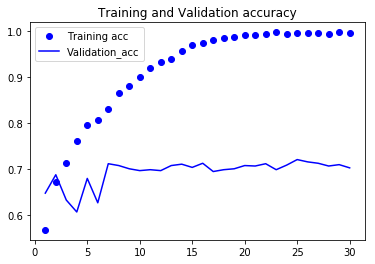

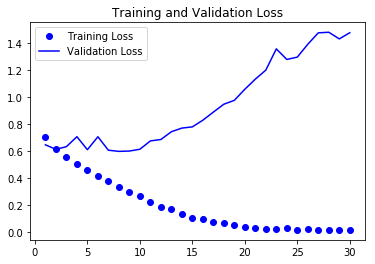

In [23]:
import matplotlib.pyplot as plt
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


These plots are showing the charecteristics of overfitting.the training accuracy increases linearly over time,whereas the validation accuracy stalls at 70-72%.the validation loss reaches its minimum after only five epochs and then stals,whereas the training loss keeps decreasing linearly it reaches nearly 0.we can remove the overfitting by Data augumantation.







## 8.Setting up a data augmentation configuration via ImageDataGenerator

In [0]:
datagen=ImageDataGenerator(rotation_range=40,
                          width_shift_range=0.2,
                          height_shift_range=0.2,
                          shear_range=0.2,
                          zoom_range=0.2,
                          horizontal_flip=True,
                          fill_mode='nearest')

## 9.Displaying some Randomly augmented training image

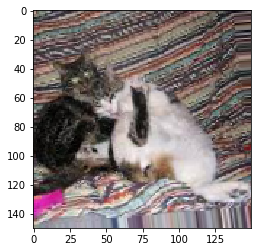

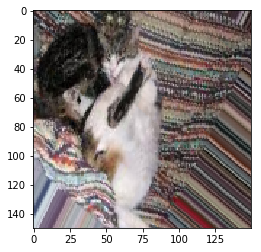

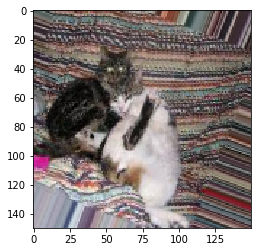

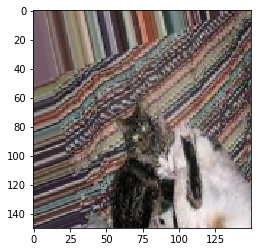

In [25]:
#first we have to import Module with image preprocessing utilities
from keras.preprocessing import image
fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
#chooses one image to augment
img_path=fnames[4]
#Reads the image and resizes it
img=image.load_img(img_path,target_size=(150,150))
#converts it into a numpy array with shape(150,150,3)
x=image.img_to_array(img)
#Reshapes it into (1,150,150,3)
x=x.reshape((1,) + x.shape)
#Generate bathches of randomly transformed images
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i%4 ==0:
        break;
plt.show()

This may not be enough to completely get rid of overfitting.To further avoid overfitting we add a dropout layer befor the densly connected classifier

## 9.Model 2:Defining a new convnet that includes dropout

In [26]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## 10.Training the convnet using data-augmentation generators

In [27]:

train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)
#validation data should not be augumented
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=32,
        class_mode='binary')
validation_generator=test_datagen.flow_from_directory(
         validation_dir,
         target_size=(150,150),
         batch_size=32,
         class_mode='binary')
history=model.fit_generator(
         train_generator,
         steps_per_epoch=100,
         epochs=100,
         validation_data=validation_generator,
         validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
100/100 [==============================] - 26s 257ms/step - loss: 0.6922 - acc: 0.5166 - val_loss: 0.6797 - val_acc: 0.5044
Epoch 2/100
100/100 [==============================] - 23s 232ms/step - loss: 0.6719 - acc: 0.5762 - val_loss: 0.6596 - val_acc: 0.5934
Epoch 3/100
100/100 [==============================] - 23s 228ms/step - loss: 0.6542 - acc: 0.6000 - val_loss: 0.6329 - val_acc: 0.6345
Epoch 4/100
100/100 [==============================] - 23s 235ms/step - loss: 0.6335 - acc: 0.6338 - val_loss: 0.6054 - val_acc: 0.6707
Epoch 5/100
100/100 [==============================] - 22s 222ms/step - loss: 0.6178 - acc: 0.6594 - val_loss: 0.5993 - val_acc: 0.6504
Epoch 6/100
100/100 [==============================] - 24s 245ms/step - loss: 0.6065 - acc: 0.6644 - val_loss: 0.6659 - val_acc: 0.6057
Epoch 7/100
100/100 [==============================] - 23s 231ms/step - loss: 0.5987 - acc: 0.6828 -

## 10.saving the model 2


In [0]:
model.save('cats_dogs1.h5')

## 11.Displaying curves of loss and accuracy during training


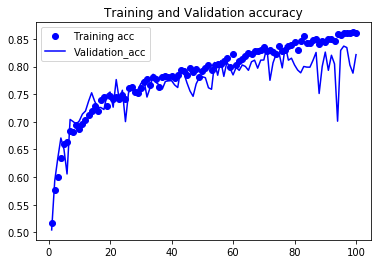

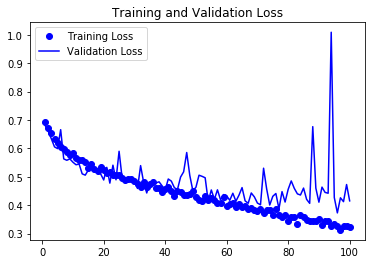

In [29]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


By using regularization techniques and by tuning the network's parameters,we may be able to get better accuracy.But it can be difficult to go with just by training model from scratch.To improve accuracy further we will have to use a pretrained model.

## 12.Instantiating the VGG16 convolution base

In [30]:
from keras.applications import VGG16
conv_base=VGG16(weights='imagenet',
               include_top=False,
               input_shape=(150,150,3))

58892288/58889256 [==============================] - 5s 0us/step


In [31]:

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## 13.Model 3:Extracting features using the pretrained convolutional base

In [32]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
base_dir='/content/DeepLearning/dogs_and_cats_small'
train_dir=os.path.join(base_dir,'train')
validation_dir=os.path.join(base_dir,'validation')
test_dir=os.path.join(base_dir,'test')
datagen=ImageDataGenerator(rescale=1./255)
batch_size=20
def extract_features(directory,sample_count):
  features=np.zeros(shape=(sample_count,4,4,512))
  labels=np.zeros(shape=(sample_count))
  generator=datagen.flow_from_directory(directory,
                                       target_size=(150,150),
                                       batch_size=batch_size,
                                       class_mode='binary')
  i=0
  for inputs_batch,labels_batch in generator:
    feature_batch=conv_base.predict(inputs_batch)
    features[i*batch_size:(i+1)*batch_size]=feature_batch
    labels[i*batch_size:(i+1)*batch_size]=labels_batch
    i+=1
    if i*batch_size>=sample_count:
      break
  return features,labels
train_features,train_labels=extract_features(train_dir,2000)
validation_features,validation_labels=extract_features(validation_dir,1000)
test_features,test_labels=extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


The extracted features are currently of shape(samples,4,4,512).we will feed them to a densly connected classifier,so first you must flatten them to (samples,8192).

In [0]:
train_features=np.reshape(train_features,(2000,4*4*512))
validation_features=np.reshape(validation_features,(1000,4*4*512))
test_features=np.reshape(test_features,(1000,4*4*512))

## 14.Defining and training the densly connected classifier

In [34]:
from keras import models
from keras import layers
from keras import optimizers
model=models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])
history=model.fit(train_features,train_labels,
                 epochs=30,
                 batch_size=20,
                 validation_data=(validation_features,validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 442us/step - loss: 0.5841 - acc: 0.6920 - val_loss: 0.4415 - val_acc: 0.8320
Epoch 2/30
2000/2000 [==============================] - 1s 280us/step - loss: 0.4213 - acc: 0.8125 - val_loss: 0.3608 - val_acc: 0.8650
Epoch 3/30
2000/2000 [==============================] - 1s 287us/step - loss: 0.3586 - acc: 0.8435 - val_loss: 0.3238 - val_acc: 0.8760
Epoch 4/30
2000/2000 [==============================] - 1s 280us/step - loss: 0.3092 - acc: 0.8735 - val_loss: 0.2982 - val_acc: 0.8890
Epoch 5/30
2000/2000 [==============================] - 1s 278us/step - loss: 0.2848 - acc: 0.8805 - val_loss: 0.2842 - val_acc: 0.8870
Epoch 6/30
2000/2000 [==============================] - 1s 285us/step - loss: 0.2600 - acc: 0.9000 - val_loss: 0.2739 - val_acc: 0.8890
Epoch 7/30
2000/2000 [==============================] - 1s 298us/step - loss: 0.2465 - acc: 0.9055 - val_loss: 0.2650 - val_acc: 0.8940


Note:-Training is very fast,because you only have to deal with two Dense layers.

## 15.Plotting the results

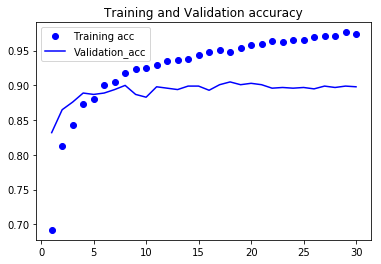

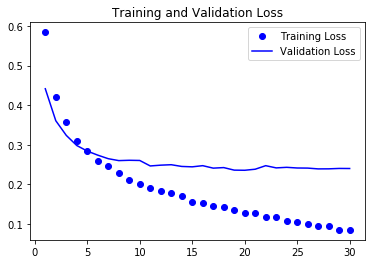

In [35]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.title("Training and Validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

We reach a validation accuracy of about 90% -much better than we achieved with the small model trained from scratch.But the plot indicates overfitting despite of using dropout.That's because this technique doesn't use data augmentation,which is essential for prevanting overfitting with small image datasets.

## 16.Model 4:Feature Extraction with data augmentation


### Adding a densly connected classifier on top of the convolutional base

In [0]:
model=models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


Before we compile and train the model ,it's very important to freeze the convolutional base.Freezing a layer or set of layers means preventing their weights from being updated during training.If we don't do this,then the representations that were previously learned by the convolutional base will be modified during training.
##### In keras we freeze a network by setting its trainable attribute to false.

In [38]:
print('This is the no. of trainable weights'
     'before freezing the conv base:',len(model.trainable_weights))

This is the no. of trainable weightsbefore freezing the conv base: 30


In [39]:
conv_base.trainable=False
print('This is the no. of trainable weights'
     'after freezing the conv base:',len(model.trainable_weights))


This is the no. of trainable weightsafter freezing the conv base: 4


## 17.Training the model end to end with a frozen convolutional base

In [40]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                fill_mode='nearest')
#validation data should not be augumented
test_datagen=ImageDataGenerator(rescale=1./255)
train_generator=train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')
validation_generator=test_datagen.flow_from_directory(
         validation_dir,
         target_size=(150,150),
         batch_size=20,
         class_mode='binary')
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])
history=model.fit_generator(
         train_generator,
         steps_per_epoch=100,
         epochs=30,
         validation_data=validation_generator,
         validation_steps=50)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 17s 173ms/step - loss: 0.5904 - acc: 0.6845 - val_loss: 0.4637 - val_acc: 0.8060
Epoch 2/30
100/100 [==============================] - 16s 157ms/step - loss: 0.4863 - acc: 0.7805 - val_loss: 0.3714 - val_acc: 0.8480
Epoch 3/30
100/100 [==============================] - 15s 154ms/step - loss: 0.4329 - acc: 0.8140 - val_loss: 0.3391 - val_acc: 0.8600
Epoch 4/30
100/100 [==============================] - 16s 156ms/step - loss: 0.4039 - acc: 0.8160 - val_loss: 0.3138 - val_acc: 0.8670
Epoch 5/30
100/100 [==============================] - 16s 156ms/step - loss: 0.3816 - acc: 0.8280 - val_loss: 0.3144 - val_acc: 0.8640
Epoch 6/30
100/100 [==============================] - 16s 156ms/step - loss: 0.3652 - acc: 0.8350 - val_loss: 0.2877 - val_acc: 0.8890
Epoch 7/30
100/100 [==============================] - 15s 154ms/step - loss: 0.3655 - acc: 0.8365 - val_lo

## 18.Plotting the results

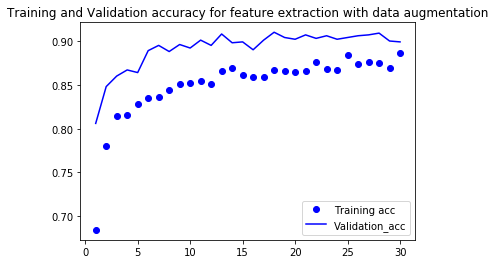

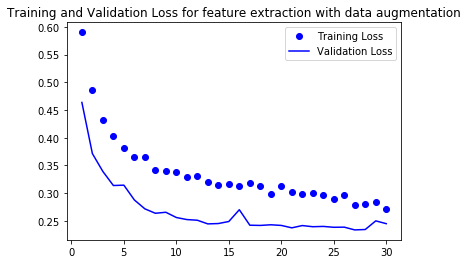

In [41]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.title("Training and Validation accuracy for feature extraction with data augmentation")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss for feature extraction with data augmentation')
plt.legend()
plt.show()


## 19.Model 4:Fine Tuning

Fine Tuning is another technique for model reuse.it consists of unfreezing a few of the top layers of a frozen model base used for feature extraction,and jointly training both the newly added part of the model and these top layers. the steps of fine-tuning a network are as follows:
###1.Add our custom network on the top of an already-trained base network.
###2.Freeze the base network.
###3.Train the part we added.
###4.Unfreeze some layers in base network.
###5.Jointly train both these layers and the part we added.

In [42]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

## 20.Freezing all layers up to a specific one

In [0]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
  if layer.name=='block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False

## 21.Fine-tuning the model

In [0]:

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5), metrics=['acc'])


In [45]:
history=model.fit_generator(train_generator,
                            steps_per_epoch=100,
                            epochs=100,
                            validation_data=validation_generator,
                            validation_steps=50)
                           

Epoch 1/100
100/100 [==============================] - 18s 182ms/step - loss: 0.2944 - acc: 0.8695 - val_loss: 0.2130 - val_acc: 0.9110
Epoch 2/100
100/100 [==============================] - 16s 165ms/step - loss: 0.2676 - acc: 0.8875 - val_loss: 0.2054 - val_acc: 0.9180
Epoch 3/100
100/100 [==============================] - 16s 164ms/step - loss: 0.2491 - acc: 0.8970 - val_loss: 0.2212 - val_acc: 0.9040
Epoch 4/100
100/100 [==============================] - 16s 160ms/step - loss: 0.2167 - acc: 0.9055 - val_loss: 0.2014 - val_acc: 0.9250
Epoch 5/100
100/100 [==============================] - 16s 157ms/step - loss: 0.2050 - acc: 0.9170 - val_loss: 0.1805 - val_acc: 0.9280
Epoch 6/100
100/100 [==============================] - 16s 164ms/step - loss: 0.1949 - acc: 0.9200 - val_loss: 0.1898 - val_acc: 0.9290
Epoch 7/100
100/100 [==============================] - 16s 165ms/step - loss: 0.1941 - acc: 0.9105 - val_loss: 0.2145 - val_acc: 0.9170
Epoch 8/100
100/100 [===========================

## 22.Displaying curves of loss and accuracy during training


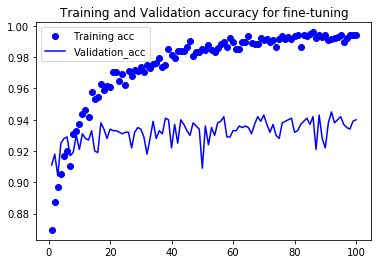

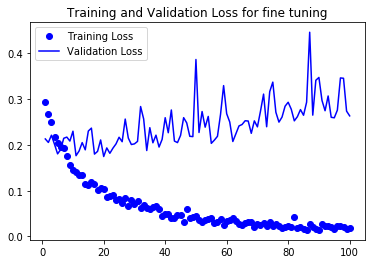

In [46]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.title("Training and Validation accuracy for fine-tuning")
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss for fine tuning')
plt.legend()
plt.show()

## 23.Evaluate this model

In [47]:
test_generator=test_datagen.flow_from_directory( test_dir,
                                               target_size=(150,150),
                                               batch_size=20,
                                               class_mode='binary')
test_loss,test_acc=model.evaluate_generator(test_generator,steps=50)
print('Test_Acc:',test_acc)

Found 1000 images belonging to 2 classes.
Test_Acc: 0.9349999916553497


# Visualizing what convnets learn

Deep-Learning models are "black boxes".learning representations are difficult to extract and present in human-readable form.But it's not true for convnets.we will discuss hear three visualization:
### 1.Visualizing intermediate convnet outputs(intermediate activations)
### 2.Visualizing convnets filters
### 3.Visualize heatmaps of class activation in an image

## 1.Visualizing intermediate activations
Visualizing intermediate activations consists of displying the feature maps that are output of various convolution and pooling layers in a network.

In [53]:
from keras.models import load_model
model=load_model('cats_dogs1.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

### Preprocessing a single image

In [54]:
img_path='/content/DeepLearning/dogs_and_cats_small/test/cats/cat.1700.jpg'
from keras.preprocessing import image
import numpy as np
img=image.load_img(img_path,target_size=(150,150))
img_tensor=image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor,axis=0)
img_tensor/=255.
print(img_tensor.shape)

(1, 150, 150, 3)


### Displaying the text picture

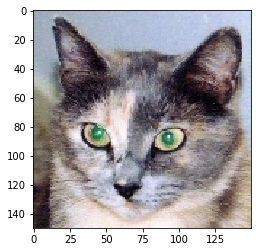

In [58]:
import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()

### Instantiating a model from an input tensor and a list of output tensors

In [60]:
from keras  import models
layer_outputs=[layer.output for layer in model.layers[:8]]
activation_model=models.Model(input=model.input,outputs=layer_outputs)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=[<tf.Tenso..., inputs=Tensor("co...)`
  This is separate from the ipykernel package so we can avoid doing imports until


## Running the model in prediction mode

In [0]:
activations=activation_model.predict(img_tensor)
# Returns a list of five Numpy arrays:one array per layer activation

In [62]:
#the activation of the first convolution layer for the cat image input:
first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 148, 148, 32)


## Visualizing the fourth channel

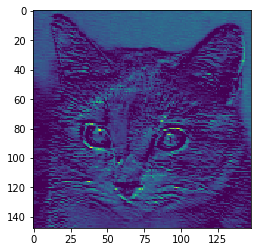

In [63]:
import matplotlib.pyplot as plt
plt.imshow(first_layer_activation[0,:,:,4],cmap='viridis')

## Visualizing the seventh channel

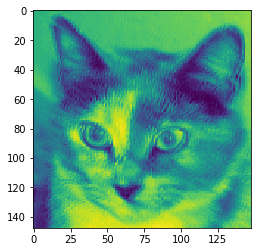

In [67]:
plt.imshow(first_layer_activation[0,:,:,7],cmap='viridis')

## Visualizing every channel in every intermediate activation

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


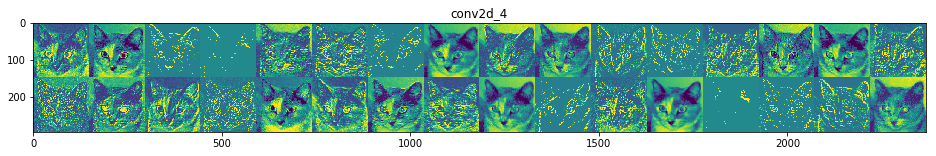

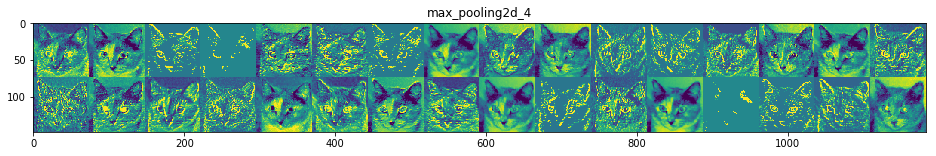

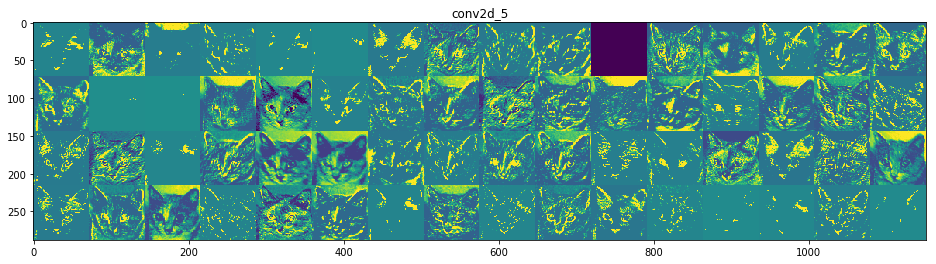

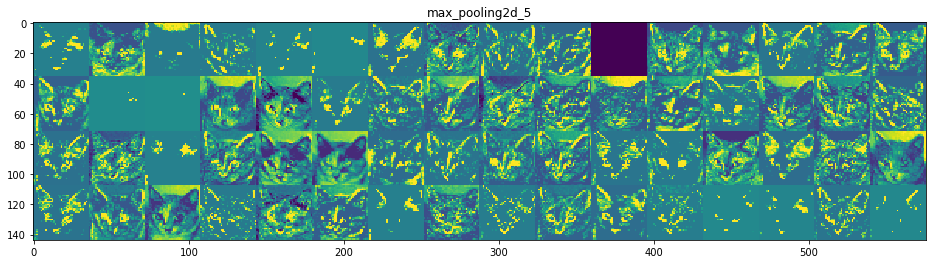

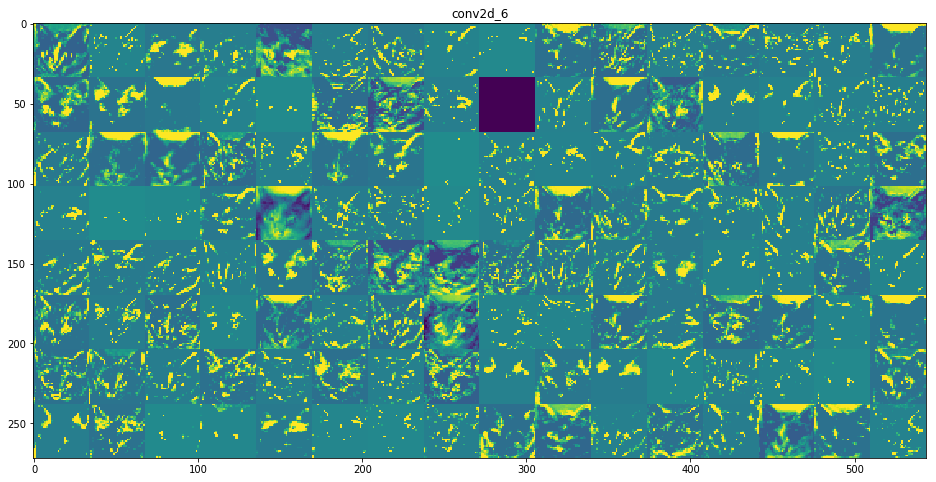

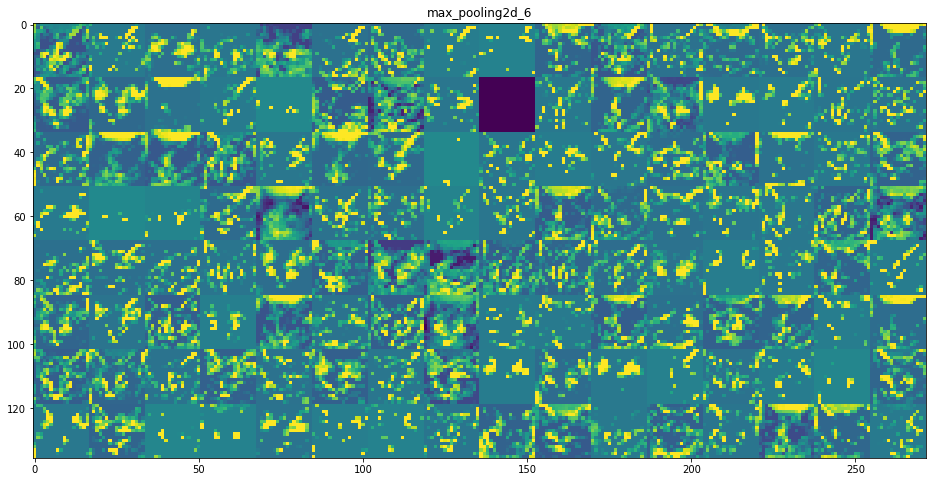

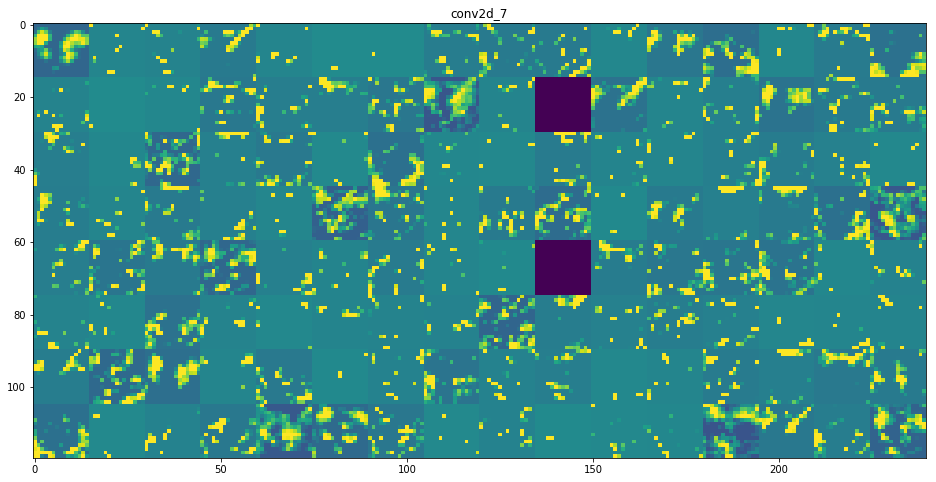

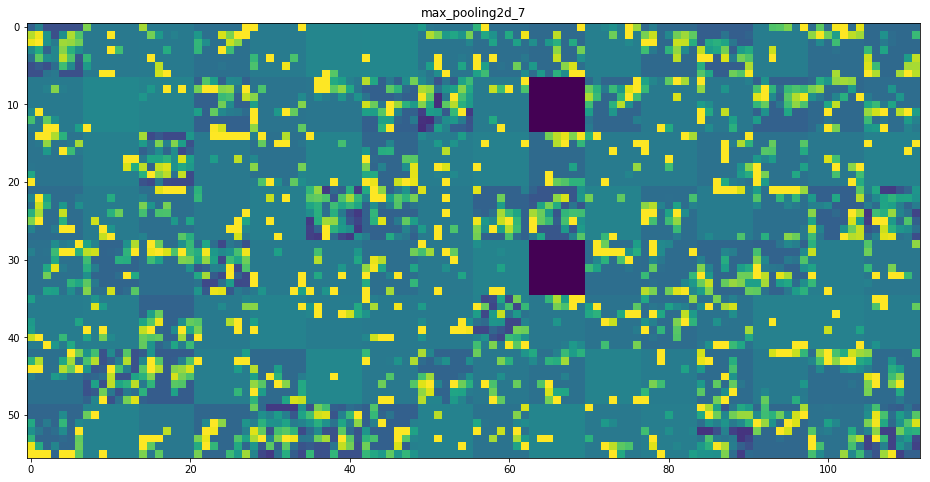

In [84]:
#names of the layers, so we can have them as part of your plot
layer_names=[]
for layer in model.layers[:8]:
  layer_names.append(layer.name)
images_per_row=16
#Displays the feature maps
for layer_name,layer_activation in zip(layer_names,activations):
  #Number of features in the feature map
  n_features=layer_activation.shape[-1]
  size=layer_activation.shape[1]
  n_cols=n_features//images_per_row
  display_grid=np.zeros((size*n_cols,images_per_row*size))
  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image=layer_activation[0,:,:,col*images_per_row+row]
      channel_image -=channel_image.mean()
      channel_image /=channel_image.std()
      channel_image *=64
      channel_image +=128
      channel_image=np.clip(channel_image,0,255).astype('uint8')
      display_grid[col*size:(col+1)*size,row*size:(row+1)*size]=channel_image
  scale=1./size
  plt.figure(figsize=(scale* display_grid.shape[1],
                      scale* display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid,aspect='auto',cmap='viridis')


# 2.Visualizing convnet filters

### Defining the loss tensor for filter visualization

In [0]:
from keras.applications import VGG16
from keras import backend as K
model=VGG16(weights='imagenet',
           include_top=False)
layer_name='block3_conv1'
filter_index=0
layer_output=model.get_layer(layer_name).output
loss=K.mean(layer_output[:,:,:,filter_index])

### Obtaining the gradients of the loss with respect to input

In [0]:
grads=K.gradients(loss,model.input)[0]

### Gradient-normalization

In [0]:
grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)

### Fetching Numpy output values given Numpy input values

In [0]:
iterate=K.function([model.input],[loss,grads])
import numpy as np
loss_value,grads_value=iterate([np.zeros((1,150,150,3))])

### Loss maximization via stochastic gradient descent

In [0]:
#starts from a gray image with some noise
input_img_data=np.random.random((1,150,150,3))*20+128
step=1.
for i in range(40):
  loss_value,grad_value=iterate([input_img_data])
  input_img_data+=grads_value*step

### Utility function to convert a tensor into a valid image

In [0]:
def deprocess_image(x):
  x-=x.mean()
  x/=(x.std()+1e-5)
  x *=0.1
  x+=0.5
  x=np.clip(x,0,1)
  x *=255
  x=np.clip(x,0,255).astype('uint8')
  return x

### Function to generate filter visualizations

In [0]:
def generate_pattern(layer_name,filter_index,size=150):
  #Builds a loss function that maximizes the activation of the nth filter of the layer under consideration
  layer_output=model.get_layer(layer_name).output
  loss=K.mean(layer_output[:,:,:,filter_index])
  #Computes the gradient of thevinput picture with regard to this loss
  grads=K.gradients(loss,model.input)[0]
  #Normalize the gradient
  grads/=(K.sqrt(K.mean(K.square(grads)))+1e-5)
  #Return the loss and grads given the input picture 
  iterate=K.function([model.input],[loss,grads])
  #Starts from a gray image with some noise
  input_img_data=np.random.random((1,size,size,3))*20+128.
  #Runs the gradient ascent for 40  steps 
  step=1
  for i in range(40):
    loss_value,grads_value=iterate([input_img_data])
    input_img_data+=grads_value*step
  img=input_img_data[0]
  return deprocess_image(img)
  

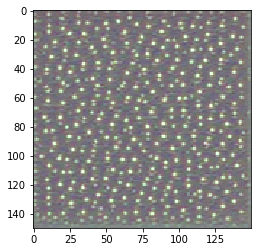

In [120]:
plt.imshow(generate_pattern('block3_conv1',0))

### Generating a grid of all filter response patterns in a layer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


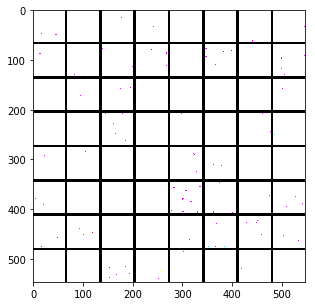

In [126]:
layer_name='block4_conv1'
size=64
margin=5
results=np.zeros((8*size+7*margin,8*size+7*margin,3))
for i in range(8):
  for j in range(8):
    filter_image=generate_pattern(layer_name,i+(j*8),size=size)
    horizontal_start=i*size+i*margin
    horizontal_end=horizontal_start+size
    vertical_start=j*size+j*margin
    vertical_end=vertical_start+size
    results[horizontal_start:horizontal_end,vertical_start:vertical_end,:]=filter_image
plt.figure(figsize=(5,5))
plt.imshow(results)

# 3.Visualizing heatmaps of class activation

### Loading the VGG16 network with pretrained weights

In [0]:
from keras.applications.vgg16 import VGG16
model=VGG16(weights='imagenet')


### Preprocessing an input image for VGG16

In [0]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input,decode_predictions
import numpy as np
img_path='/content/DeepLearning/dogs_and_cats_small/test/dogs/dog.1600.jpg'
img=image.load_img(img_path,target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)

In [145]:
preds=model.predict(x)
print('predicted:',decode_predictions(preds,top=3)[0])

40960/35363 [==================================] - 0s 0us/step
predicted: [('n02115641', 'dingo', 0.17781383), ('n02105162', 'malinois', 0.1721806), ('n02091032', 'Italian_greyhound', 0.12791374)]


In [146]:
np.argmax(preds[0])

273

### Setting up the Grad-CAM algorithm

In [0]:
dog_output=model.output[:386]
last_conv_layer=model.get_layer('block5_conv3')
grads=K.gradients(dog_output,last_conv_layer.output)[0]
pooled_grads=K.mean(grads,axis=(0,1,2))
iterate=K.function([model.input],[pooled_grads,last_conv_layer.output[0]])
pooled_grads_value,conv_layer_output_value=iterate([x])
for i in range(512):
  conv_layer_output_value[:,:,i]*=pooled_grads_value[i]
heatmap=np.mean(conv_layer_output_value,axis=-1)

### Heatmap post-processing

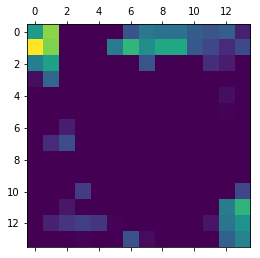

In [149]:
heatmap=np.maximum(heatmap,0)
heatmap/=np.max(heatmap)
plt.matshow(heatmap)

### Superimposing the heatmap with the original picture

In [156]:
import cv2
img=cv2.imread(img_path)
heatmap=cv2.resize(heatmap,(img.shape[1],img.shape[0]))
heatmap=np.uint8(255*heatmap)
heatmap=cv2.applyColorMap(heatmap,cv2.COLORMAP_JET)
superimposed_img=heatmap*0.4+img
cv2.imwrite('/content/DeepLearning/dogs_and_cats_small/test/dogs/dog.1600.jpg',superimposed_img)

True